# Machine Learning using Scikit Learn (sklearn)

This notebook demonstrates some of the most useful functions of the scikit-learn library

In [702]:


We_will_cover = [
    
    "0. end to end scikit learn worksflow",
    "1. getting the data ready",
    "2. choose the right estimator/ algorithm for our problems",
    "3. fit the model/algorithm and use it to make predictions on our data",
    "4. evaluating a model",
    "5. improve the model",
    "6. Save and load a trained model",
    "7. putting it all together"]

#### 0 : end to end scikit learn worksflow

In [703]:
#getting data ready
import pandas as pd
import numpy as np

#### 1 : getting the data ready

In [704]:
heart_disease= pd.read_csv("heart-disease.csv")

In [705]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [706]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#303 r x 14 cols

In [707]:
#create X (called features matrix)
x = heart_disease.drop("target", axis = 1)

#create Y ( called target matrix)
y = heart_disease['target']

                

#### 2 : choose the right estimator/ algorithm for our problems

In [708]:
#choose the right model and hyperparameters
# RandomForestClassifier is classification machine learning model

In [709]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [710]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3 : fit the model/algorithm and use it to make predictions on our data

In [711]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [712]:
clf.fit(x_train, y_train);

###### making prediction now

In [713]:
#possibility of error
# y_label= clf.predict(np.array([0,2,3,4]))

In [714]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [715]:
y_test

110    1
40     1
31     1
101    1
86     1
      ..
37     1
300    0
162    1
284    0
166    0
Name: target, Length: 61, dtype: int64

#### 4 : Evaluate the model on training data and test data

In [716]:
clf.score(x_train, y_train)

1.0

In [717]:
clf.score(x_test, y_test)

0.8032786885245902

In [718]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [719]:
print(classification_report (y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [720]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [721]:
accuracy_score(y_test, y_preds)

0.8032786885245902

#### 5 : improve the model

#try different amount of n_estimators

* Accuracy shows how often a classification ML model is correct overall. 
* Precision shows how often an ML model is correct when predicting the target class.
* Recall shows whether an ML model can find all objects of the target class

* https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall

In [722]:
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.40983606557377%

Trying model with 20 estimators...
Model accuracy on test set: 77.04918032786885%

Trying model with 30 estimators...
Model accuracy on test set: 81.9672131147541%

Trying model with 40 estimators...
Model accuracy on test set: 75.40983606557377%

Trying model with 50 estimators...
Model accuracy on test set: 77.04918032786885%

Trying model with 60 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 70 estimators...
Model accuracy on test set: 73.77049180327869%

Trying model with 80 estimators...
Model accuracy on test set: 80.32786885245902%

Trying model with 90 estimators...
Model accuracy on test set: 73.77049180327869%



In [723]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, x, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.40983606557377%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 75.40983606557377%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 75.40983606557377%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 73.77049180327869%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 80.32786885245902%
Cross-validation score: 82.8142076502

#### 6 : save a model for someone else to use

import pickle

`FIX IT` #pickle.dump(clf, open("random_forest__model_1.pkl", "wb"))

loaded_model = pickle.load(open("random_forest__model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

# Put it all together ! :D

In [724]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
executable: /Users/shum/miniconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.2
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: libomp
       filepath: /Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/.dylibs/libomp.dylib
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libopenblas
       filepath: /Users/shum/miniconda3/lib/python3.11/site-packages/numpy/.dylibs/libopenblas64_.0.dylib
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads

In [725]:
We_will_cover

['0. end to end scikit learn worksflow',
 '1. getting the data ready',
 '2. choose the right estimator/ algorithm for our problems',
 '3. fit the model/algorithm and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve the model',
 '6. Save and load a trained model',
 '7. putting it all together']

#Getting Started AGAIN!

# `Secton 1`

#standard imports

In [726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Ready to be used for MACHINE LEARNING

Three main things we need to do:

    *1. Split the data into features and labels ('x' & 'y')
    *2. Filling (imputing) or disregarding missing values
    *3. Converting non-numerical values to numerical values (called feature encoding)


In [727]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [728]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [729]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#splitting into training and test sets

In [730]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [731]:
x.shape[0]*0.8

242.4

#above 80% of the data set is train set size

#convert data to numbers/make numerical

In [732]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [733]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [734]:
len(car_sales)

1000

In [735]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [736]:
#Split the data into x and y

x = car_sales.drop("Price", axis = 1)

#create Y ( called target matrix)
y = car_sales['Price'] 

In [737]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [738]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [739]:
#split into train and test sets

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2)

#build Machine Learning Model
`honda not categorical`
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

#must change data type for string Nissan

In [740]:
#Turn the categories into numers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [741]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [742]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


# Another way to convert the data into numerical is using Dummies

In [743]:
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]]).astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


Let us refit the model

In [744]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y, 
                                                    test_size=0.2)

model.fit(x_train, y_train);

In [745]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [746]:
model.score(x_test, y_test)

0.0

# et voila!!

## How about dealing with missing values now?

1. Fill them with some value also known as imputation
2. Remove the samples with missing data

In [747]:
#import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [748]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [749]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#let's try and convert data into numbers again

In [750]:
#create y and z 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [751]:
#Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [752]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#Let's fill missing data with Pandas

In [753]:
#Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)



In [754]:
#Quick check on dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [755]:
#Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [756]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [757]:
len(car_sales_missing)

950

In [758]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Note: The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

In [759]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [760]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [761]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# Fill missing values with Scikit-Learn

In [762]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [763]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [764]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [765]:
#drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

#drop the rows with no label
car_sales_missing.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [766]:
# split into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [767]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [768]:
y.isna().sum()

0

In [769]:
#Filling missing values with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & "numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features ),
    ("door_imputer",door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [770]:
car_sales_filled = pd.DataFrame(filled_x, 
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [771]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [772]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [773]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [774]:
y.isna().sum()

0

In [775]:
transformed_x.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [776]:
#we got data our data as numbers and filled (no missing values)
#Let us fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.21990196728583944

# `Section 2`

# 2 - focusing back at Choosing the right estimator for your problem

# Note - ML Models/Algortihms are called estimators in Scikit 

## Classification problem - predicting a category (heart disease or not)
## clf is the short for classification estimator / classification model variable name
## Regression problem - predicting a category (selling price of a car)


#### Understand the ML models according to the problem : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

2.1 Picking a Machine Learning Model for a Regression Problem

In [777]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [778]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])

In [779]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [780]:
housing_df.size

165120

In [781]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [782]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [783]:
housing_df = housing_df.drop("MedHouseVal", axis = 1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Trying different ML models and categories

In [784]:
# Import algorithm /estimator
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

#Create the data
x = housing_df.drop('target', axis=1)
y = housing_df["target"] #mediam house price in $100,000s

#Split the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

#Instantiate and fit the model
model = Ridge()
model.fit(x_train, y_train)

#Check the score of the model on the test set
model.score(x_test, y_test)

0.5758549611440126

# r2 , coefficient of determination assesses how strong the linear relations is between two variables

# this coefficient is the default regression evaluation metric

# OR you can say how predictive are the features of the target variable

## *RandomForrestRegressor which is based on what we call a Decision Tree
#### EnsembleRegressors. Ensemble is another word for multiple models put together to make a decision.

###_estimator = 100 default

# Random Forest Regressor can be used for both regression AND classifications models

In [785]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Create the data
x = housing_df.drop('target', axis=1)
y = housing_df["target"] #mediam house price in $100,000s

#Split the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.8066196804802649

# Jumping to Classification

#### heart_disease= pd.read_csv("heart-disease.csv")

In [786]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### target column - whether heart disease or NOT > classification

In [787]:
len(heart_disease)

303

Consulting the map which says LinearSVC

In [788]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Set up random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]



In [789]:

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)   

#Evaluate the LinearSVC
clf.score(x_test, y_test)

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [790]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [791]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)   

#Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

### recommendation is if the data is structured-----> use ensemble method

### recommendation is if the data is unstructured-----> use deep learning or transfer learning

# `Section 3`

# 3.1  - Fitting the model to data

In [792]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up random seed
np.random.seed(42)

#Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()


#Fit the model to the data --> #Training the machine learning model which will use the patterns while in production to provide the output
# x ---> y / f(x) = y
clf.fit(x_train, y_train)   

#Evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

In [793]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [794]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## 3.2 Make predictions using a Machine Learning Model

### Use a trained model to make predictions

Two ways to make prediction:
1. predict()
2. predict_proba()

# Make predictions with predict()

In [795]:
x_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [796]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [797]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [798]:
#Compare predictions to truth labels to evaluate the model

# Frist method

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [799]:
# Second method

clf.score(x_test, y_test)

0.8524590163934426

In [800]:
#Third method

from sklearn.metrics import accuracy_score


In [801]:
accuracy_score(y_test, y_preds)

0.8524590163934426

 GORGEOUS!!!!

# Make predictions with `predict_proba()`

In [802]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

# hey let us see `predict()` on regression models

In [803]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [804]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create Data
x = housing_df.drop("target", axis = 1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [805]:
y = housing_df["target"]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [806]:
#Split the data
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2)

In [807]:
# Create model instance OR instantiate the class RandomForestRegressor
model = RandomForestRegressor() #defaut or (n_estimator=10)

model.fit(x_train, y_train)


RandomForestRegressor()

In [808]:
#Make prediction
y_preds = model.predict(x_test)

In [809]:
y_preds[:10]

array([1.23346  , 3.9007018, 1.96461  , 0.95506  , 1.6487704, 3.1585203,
       1.67631  , 4.4288521, 1.46763  , 2.9496   ])

In [810]:
np.array(y_test[:10])

array([1.03   , 3.821  , 1.726  , 0.934  , 0.965  , 2.648  , 1.573  ,
       5.00001, 1.398  , 3.156  ])

In [811]:
len(y_preds)

16512

In [812]:
len(y_test)

16512

#MEAN ABS ERROR - avg diff between predicted values and true values

In [813]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3791375126029556

# `Section 4`

# 4 Evaluating a Machine Learning Model

Three ways to evaluate Scikit Lern models/estimators:

1. Estimator's built in score method
2. The Scoring parameter
3. Problem specific Metric functions

#### https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating with score method

Score Method on Classification

In [814]:
from sklearn.ensemble import RandomForestClassifier

In [815]:
np.random.seed(42)

In [816]:
# Create x and y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


In [817]:
#Create train and test
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

#Instantiate classififer or create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

#Fit classifier to the training data
clf.fit(x_train, y_train);

In [818]:
clf.score(x_train, y_train) # not to be scored using on train set, ofcourse!

1.0

In [819]:
clf.score(x_test, y_test) # good

0.7892561983471075

#RandomForest is one of the most powerful and fastest ensemble algorithms

Score Method on Regression

In [820]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create x and y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
#Create train and test
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

#Instantiate Regressor or create a Regressor model instance
model = RandomForestRegressor(n_estimators=2)

#Fit classifier to the training data
model.fit(x_train, y_train);

model.score(x_test, y_test)

0.05683934607160113

 The default score() evaluation matrix of regression is r_squared for regression algos
 Highest = 1, lowest = 0


## 4.2 Evaluating with score parameter

In [821]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [822]:
np.random.seed(42)

In [823]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train);


In [824]:
clf.score(x_test, y_test)

0.7892561983471075

In [825]:
cross_val_score(clf, x, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

#splitting into an arbitrary number of 5 for cross validation above

In [826]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(x_test, y_test)

#Take mean of 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score


(0.7892561983471075, 0.8248087431693989)

In [827]:
#Scoring parameter is set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### 1. Accuracy

In [828]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv = 5)

In [829]:
cross_val_score 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [830]:
np.mean(cross_val_score)

0.8248087431693989

#mean accuracy of the model is 0.8248087431693989

In [831]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


In [832]:
# 82.48% likely to be a correct model / accurate model to predict  label ('target')

In [833]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2. Area under the ROC curve

** area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve
* ROC curve

ROC curves are a comparison of a model's true postive TPR v/s false positive rate FPR

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [834]:
from sklearn.metrics import roc_curve

In [835]:
#create sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [836]:
#fit the classifier
clf.fit(x_train, y_train)

RandomForestClassifier()

In [837]:
#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]



array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [838]:
len(y_probs)

61

In [839]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [840]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

#Now let us visualize this, which should make more sense

In [841]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

         

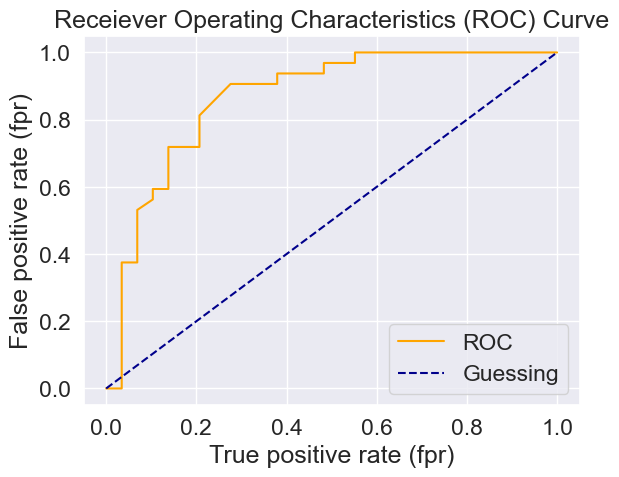

In [842]:
# Plot roc curve
plt.plot(fpr, tpr, color= "orange", label="ROC")

#Plot line with no predictive power (baseline)
plt.plot([0,1], [0,1], color = "darkblue", linestyle="--", label="Guessing")

#Customize the plot
plt.xlabel("True positive rate (fpr)")
plt.ylabel("False positive rate (fpr)")
plt.title("Receiever Operating Characteristics (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr, tpr)

In [843]:
from sklearn.metrics import roc_auc_score # checking auc along

In [844]:
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

#Plot perfect ROC curve and AUC score
*fpr, tpr, thresholds = roc_curve(y_test, y_test)
*plot_roc_curve(fpr, tpr)

In [845]:
#perfect AUc score
roc_auc_score(y_test, y_test)

1.0

#### In a nutshell:

*ROC curves and AUC metrics are evaluation metrics for binary classification models 
(a model which predicts one thing or another, such as heart disease or not).

*The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) 
at different classification thresholds.

*The AUC metric tells you how well your model is at choosing between classes 
(for example, how well it is at deciding whether someone has heart disease or not).
A perfect model will get an AUC score of 1.

#### 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict

In essence, givin you an idea of where the model is getting confused.

In [846]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [847]:
# Vislualize confusion matrix with pd.rosstab()
pd.crosstab(y_test, y_preds, rownames = ["Actual Label"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [848]:
len(y_preds)

61

#sum of 23+26+6+6 is same as len

In [849]:
# Make confusion matrix with Seaborn (lib built on the tp of matplotlib) heatmap
import seaborn as sns


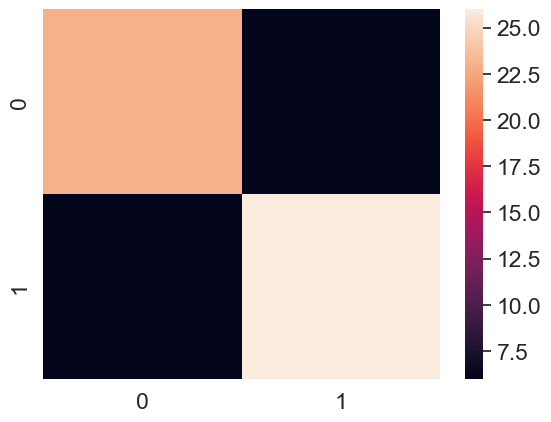

In [850]:
#Set font scale 
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plit it using seaborn
sns.heatmap(conf_mat);

####Creating a confusion matrix using Scikit Learn

Sklearn version 1.0 +

In [851]:
import sklearn
sklearn.__version__

'1.3.0'

** 1) From Estimator and 2) From Predictions

*ConsfusionMatrixDisplay is the class

In [852]:
clf

RandomForestClassifier()

In [853]:
from sklearn.metrics import ConfusionMatrixDisplay

In [854]:
x.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        

In [855]:
y_train

71     1
26     1
49     1
72     1
241    0
      ..
127    1
255    0
160    1
252    0
190    0
Name: target, Length: 242, dtype: int64

In [856]:
clf.fit(x_train, y_train)

RandomForestClassifier()

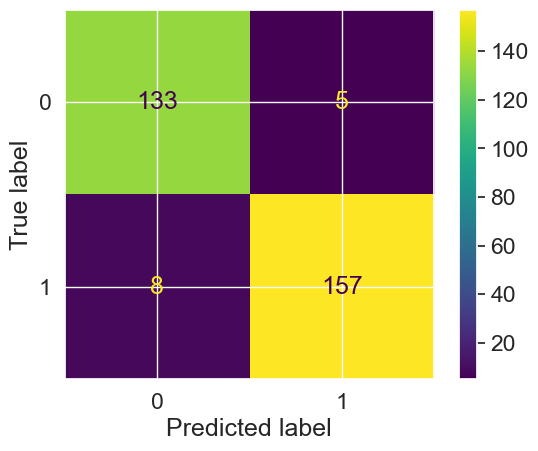

In [860]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y) 

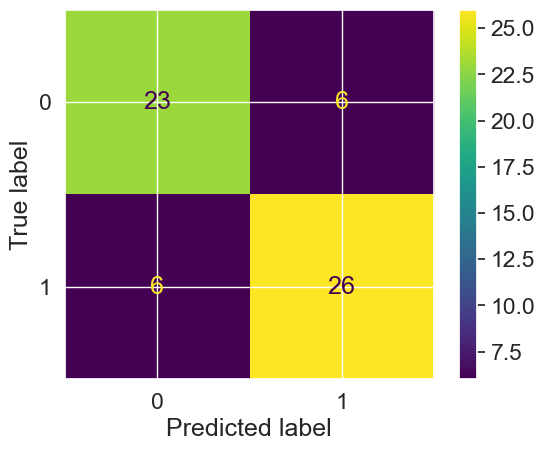

In [667]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

*Classification Report, a number of evaluation metrics ratehr than single one

#### 4. Classification Report

In [668]:
from sklearn.metrics import classification_report

In [669]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. 
A model which produces no false positives has a precision of 1.0.
    
* Recall - Indicates the proportion of actual positives which were correctly classified. 
    A model which produces no false negatives has a recall of 1.0.
    
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

#### * where can a wide spectrum of classification can be used (class imbalance)
let us say 10k people , one of them has disease - who?

### <class imbalance>

In [670]:
#Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #(only one positive case)

disease_preds = np.zeros(10000) #model predicts every case 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shum/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

`Accuracy` is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

`Precision` and recall become more important when classes are imbalanced.

If false positive predictions are worse than false negatives, aim for higher precision.

If false negative predictions are worse than false positives, aim for higher recall.

`F1-score` is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Crux = compare models for what they have predicted vs what they should have predicted - goof!

In [671]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df["target"] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


R^2

Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.

In [672]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)



In [673]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [674]:
RandomForestRegressor()

RandomForestRegressor()

In [675]:
model.score(x_test, y_test)

0.5106393318965518

In [676]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [677]:
y_test.mean()

0.5245901639344263

In [678]:
from sklearn.metrics import r2_score

In [679]:
#FIll an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [680]:
y_test_mean[:10]

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016])

In [681]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [682]:
r2_score(y_true=y_test, y_pred=y_test) # fun!!

1.0

Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [683]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.23754098360655734

In [684]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
9,1,0.86,-0.14
119,1,0.73,-0.27
223,0,0.03,0.03
268,0,0.01,0.01
33,1,0.45,-0.55


In [685]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.23754098360655734

Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [686]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.12204426229508197

In [687]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [688]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.12204426229508197

In [689]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

/var/folders/85/b2g6jpgx1kx6dpr7dk0qq4rr0000gn/T/ipykernel_883/3223351396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample


In [690]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [691]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.12204426229508197

In [692]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,20.0000
111,1,0.47,-0.53,20.0000
246,0,0.13,0.13,20.0000
60,1,0.81,-0.19,20.0000
...,...,...,...,...
249,0,0.52,0.52,20.0000
104,1,0.99,-0.01,20.0000
300,0,0.03,0.03,20.0000
193,0,0.00,0.00,20.0000


In [693]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

19.672145901639343



`Classification Model Evaluation Metrics/Techniques`

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

`Which classification metric should you use?`

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

`Regression Model Evaluation Metrics/Techniques`

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

`Which regression metric should you use?`

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

### 4.2.3  Using the scoring parameter

In [694]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

classification model and the heart disease dataset

In [695]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [696]:
len(heart_disease)

303

In [697]:
np.random.seed(42)

#Cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

* We can find the same using the scoring parameter and passing it `accuracy`, `precision`, `recall`, `f1` and `regression`

# `Section 5`

# 5 Improving a model / hyperparamater tuning

First predictions = baseline predictions
First model = baseline model

A. Improve from a data perspective:
* Could we collect more data?
* Could we improve the data?

B. Improve from the model perspective:
* Is there a better model to use simple or complex?
* Could we improve the current model?

`Parameter` = model find these patterns in data

`Hyperparameter` = settings on a model you can adjust to improve the ability to find patterns

Let us learn through an example and understand itsey-bitsssssy bettah!

In [698]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [699]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Three ways to adjust hyperparameter

* By hand
* RandomSearchCV
* Exhaustively with GridSearchCV